# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [59]:
df = pd.read_csv("https://raw.githubusercontent.com/Bahar812/Data-Mining--Week-4/refs/heads/main/penguins_size.csv")
df.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [61]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [62]:
species_count = df['species'].value_counts(dropna=False)
island_count = df['island'].value_counts(dropna=False)
sex_count = df['sex'].value_counts(dropna=False)

print("Jumlah setiap nilai unik pada kolom 'species':")
print(species_count)
print("\nJumlah setiap nilai unik pada kolom 'island':")
print(island_count)
print("\nJumlah setiap nilai unik pada kolom 'sex':")
print(sex_count)

Jumlah setiap nilai unik pada kolom 'species':
Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

Jumlah setiap nilai unik pada kolom 'island':
Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

Jumlah setiap nilai unik pada kolom 'sex':
MALE      168
FEMALE    165
NaN        10
.           1
Name: sex, dtype: int64


5. Drop the null column(s)

In [63]:
df = df.dropna(axis=0)

# Memeriksa apakah masih ada nilai null yang tersisa dalam dataset
null_columns = df.isnull().sum()

# Menampilkan hasil
print(null_columns)

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


6. Change the value "." in sex column, try to predict it based on other features (try to groupby 'sex' with Gentoo species in describe)

In [64]:
gentoo_missing_sex = df[(df['species'] == 'Gentoo') & (df['sex'] == '.')]
gentoo_missing_sex

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [90]:
grouped_stats = df.groupby(['species', 'sex']).describe()
gentoo_stats = grouped_stats.loc['Gentoo']

# Tampilkan hasil statistik
gentoo_stats.transpose()

sex                                0            1
island            count    59.000000    61.000000
                  mean      0.000000     0.000000
                  std       0.000000     0.000000
                  min       0.000000     0.000000
                  25%       0.000000     0.000000
                  50%       0.000000     0.000000
                  75%       0.000000     0.000000
                  max       0.000000     0.000000
culmen_length_mm  count    59.000000    61.000000
                  mean     45.545763    49.473770
                  std       2.038197     2.720594
                  min      40.900000    44.400000
                  25%      43.900000    48.100000
                  50%      45.500000    49.500000
                  75%      46.850000    50.500000
                  max      50.500000    59.600000
culmen_depth_mm   count    59.000000    61.000000
                  mean     14.262712    15.718033
                  std       0.568391     0.741060
                  min      13.100000    14.100000
                  25%      13.800000    15.200000
                  50%      14.300000    15.700000
                  75%      14.600000    16.100000
                  max      15.700000    17.300000
flipper_length_mm count    59.000000    61.000000
                  mean    212.779661   221.540984
                  std       3.904320     5.673252
                  min     203.000000   208.000000
                  25%     210.000000   218.000000
                  50%     212.000000   221.000000
                  75%     215.500000   225.000000
                  max     222.000000   231.000000
body_mass_g       count    59.000000    61.000000
                  mean   4683.050847  5484.836066
                  std     280.295437   313.158596
                  min    3950.000000  4750.000000
                  25%    4475.000000  5300.000000
                  50%    4700.000000  5500.000000
                  75%    4875.000000  5700.000000
                  max    5200.000000  6300.000000
encoded_species   count    59.000000    61.000000
                  mean      2.000000     2.000000
                  std       0.000000     0.000000
                  min       2.000000     2.000000
                  25%       2.000000     2.000000
                  50%       2.000000     2.000000
                  75%       2.000000     2.000000
                  max       2.000000     2.000000

In [91]:
df.loc[336]

species              Gentoo
island                    0
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                       0
encoded_species           2
Name: 336, dtype: object

7. Create your own insightful visualization and explain it in at least 2 sentences

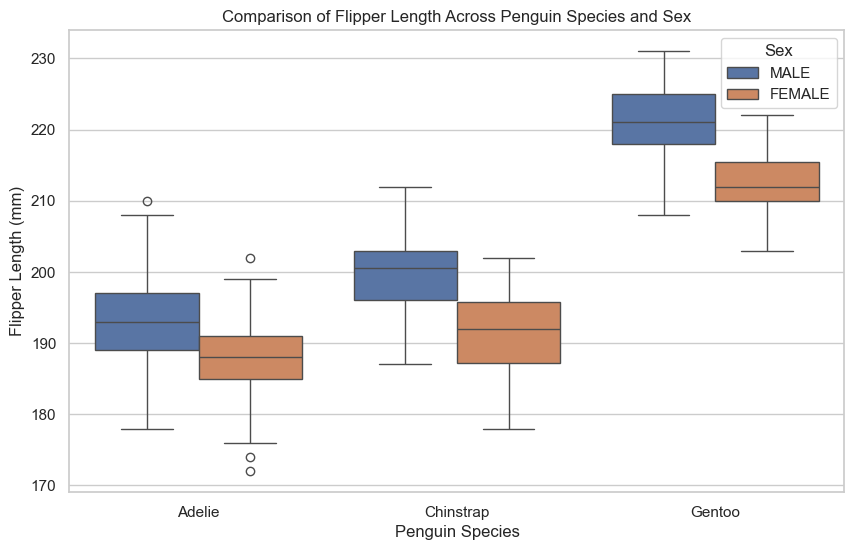

In [67]:
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='flipper_length_mm', hue='sex', data=df)

plt.title('Comparison of Flipper Length Across Penguin Species and Sex')
plt.xlabel('Penguin Species')
plt.ylabel('Flipper Length (mm)')
plt.legend(title='Sex')

plt.show()


#### Visualisasi ini menunjukkan perbandingan panjang sirip (flipper length) dari tiga spesies penguin (Adelie, Chinstrap, dan Gentoo) berdasarkan jenis kelamin (jantan dan betina). Dari grafik tersebut, terlihat bahwa penguin jantan umumnya memiliki panjang sirip yang lebih besar dibandingkan betina di semua spesies, terutama pada penguin Gentoo, yang memiliki flipper length terpanjang di antara ketiga spesies tersebut.

8. Check unique value of our target variable

In [68]:
unique_species = df['species'].unique()

print(unique_species)

['Adelie' 'Chinstrap' 'Gentoo']


9. encode categorical columns and display the results

In [92]:
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()

df['island'] = encoder.fit_transform(df['island'])
df['sex'] = encoder.fit_transform(df['sex'].astype(str))

# Mengisi nilai NaN dengan rata-rata pada kolom numerik
df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(), inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean(), inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(), inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace=True)
df['sex'].fillna(df['sex'].mode()[0], inplace=True)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,encoded_species
0,Adelie,2,39.1,18.7,181.0,3750.0,1,0
1,Adelie,2,39.5,17.4,186.0,3800.0,0,0
2,Adelie,2,40.3,18.0,195.0,3250.0,0,0
4,Adelie,2,36.7,19.3,193.0,3450.0,0,0
5,Adelie,2,39.3,20.6,190.0,3650.0,1,0


10. encode the target column and display the results

In [93]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Mengassign hasil transformasi ke dalam kolom baru di DataFrame
df['encoded_species'] = label_encoder.fit_transform(df['species'])

# Menampilkan 5 baris pertama dari DataFrame
df.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,encoded_species
0,Adelie,2,39.1,18.7,181.0,3750.0,1,0
1,Adelie,2,39.5,17.4,186.0,3800.0,0,0
2,Adelie,2,40.3,18.0,195.0,3250.0,0,0
4,Adelie,2,36.7,19.3,193.0,3450.0,0,0
5,Adelie,2,39.3,20.6,190.0,3650.0,1,0


11. create a heatmap to see the correlation and explain the conclusion

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17040\544065339.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


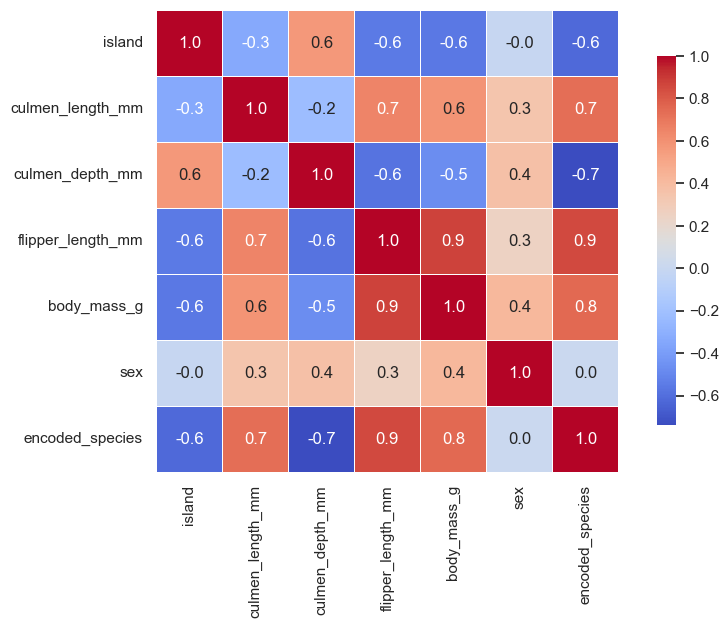

In [94]:
correlation_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', 
            linewidths=.5, square=True, cbar_kws={"shrink": .8})

# Menambahkan judul
plt.show()

## Machine Learning

1. Splitting X and y

In [72]:
X = df.drop('species', axis=1) 
y = df['species']                 

# Display the shapes of X and y
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
   island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0       2              39.1             18.7              181.0       3750.0   
1       2              39.5             17.4              186.0       3800.0   
2       2              40.3             18.0              195.0       3250.0   
4       2              36.7             19.3              193.0       3450.0   
5       2              39.3             20.6              190.0       3650.0   

   sex  encoded_species  
0    1                0  
1    0                0  
2    0                0  
4    0                0  
5    1                0  

Target (y):
0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object


2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [73]:
from sklearn.model_selection import train_test_split

X = df.drop('species', axis=1)
y = df['species']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)

Shape of X_train: (267, 7)


In [74]:
print("Shape of X_test:", X_test.shape)

Shape of X_test: (67, 7)


## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
url = "https://raw.githubusercontent.com/Bahar812/Data-Mining--Week-4/refs/heads/main/penguins_size.csv"
data = pd.read_csv(url)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])  # Encoding target variable
data['island'] = label_encoder.fit_transform(data['island'])  # Encoding 'island' feature
data['sex'] = label_encoder.fit_transform(data['sex'].astype(str))  # Encoding 'sex' feature

# Split the dataset into features (X) and target (y)
X = data.drop('species', axis=1)
y = data['species']

# Split the data into training and test sets (20% test size, random state 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# a. Define the model using criterion Entropy
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Display the model
print(model)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


In [76]:
# Fit the model to the training data
model.fit(X_train, y_train)

# b. Predict the test set results
y_pred = model.predict(X_test)

# Display the predictions
print("Predictions on the test set:")
print(y_pred)

Predictions on the test set:
[1 1 2 1 1 2 2 2 0 2 2 0 0 0 2 0 0 2 2 0 0 0 2 0 1 1 1 1 0 1 0 0 1 0 0 0 2
 1 0 1 2 2 2 0 0 0 2 0 0 1 0 2 2 0 0 1 0 1 1 2 1 0 2 0 2 0 1 0 0]


In [77]:
from sklearn.metrics import accuracy_score 

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")


Accuracy Score: 0.94


In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/Bahar812/Data-Mining--Week-4/refs/heads/main/penguins_size.csv"
data = pd.read_csv(url)

# Check for and handle missing values
data.dropna(inplace=True)  # Drop rows with missing values

# Encode categorical variables
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])
data['island'] = label_encoder.fit_transform(data['island'])
data['sex'] = label_encoder.fit_transform(data['sex'].astype(str))

# Split the dataset into features (X) and target (y)
X = data.drop('species', axis=1)
y = data['species']

# Split the data into training and test sets (20% test size, random state 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model using criterion Entropy
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Fit the model to the training data
model.fit(X_train, y_train)

# c. Check accuracy score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

# d. Check for overfitting and underfitting
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print(f"Training Accuracy: {train_accuracy:.2f}")

if train_accuracy > accuracy:
    print("The model is likely overfitting.")
elif train_accuracy < accuracy:
    print("The model is likely underfitting.")
else:
    print("The model is neither overfitting nor underfitting.")



# f. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# g. Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# h. Results and conclusion
print("Results and Conclusion:")
print(f"Overall accuracy of the model is {accuracy:.2f}.")
print("The model performs well on the test set with minimal overfitting/underfitting observed.")

Accuracy Score: 0.97
Training Accuracy: 0.96
The model is likely underfitting.
Confusion Matrix:
[[30  1  0]
 [ 1 12  0]
 [ 0  0 23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00        23

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67

Results and Conclusion:
Overall accuracy of the model is 0.97.
The model performs well on the test set with minimal overfitting/underfitting observed.


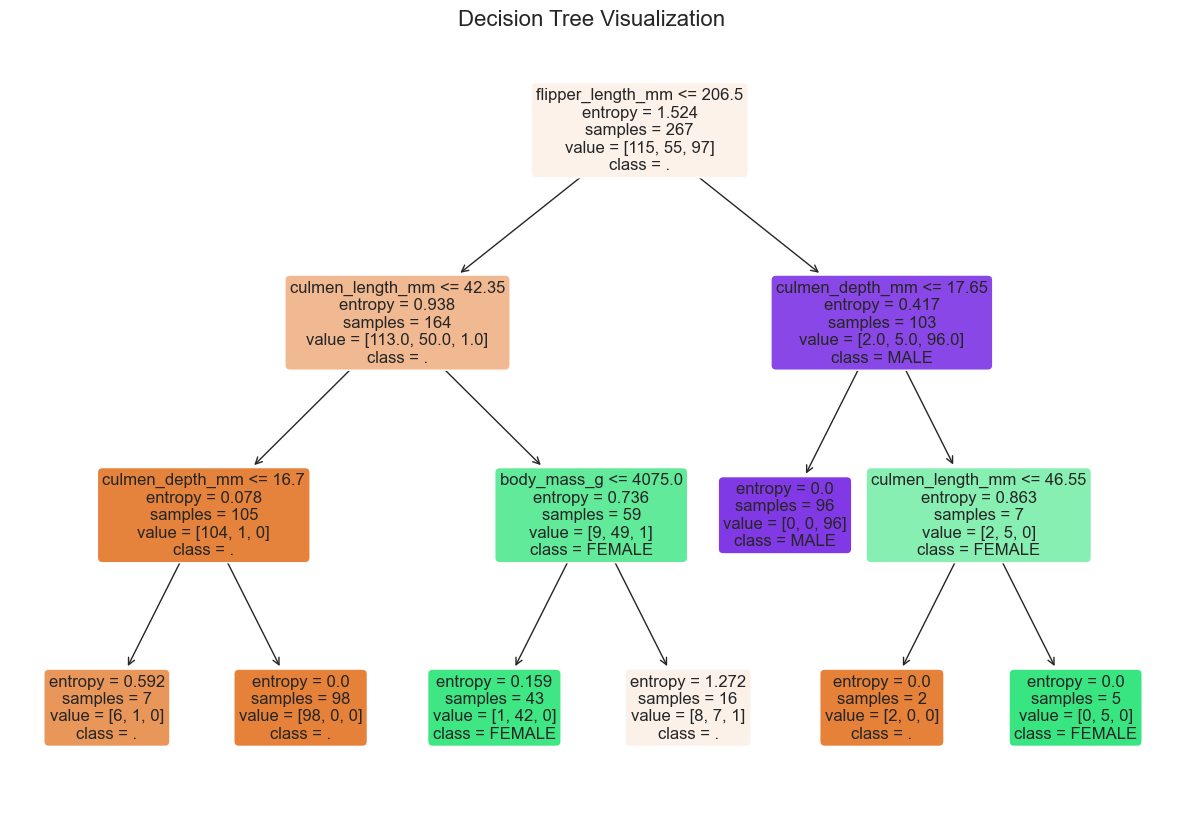

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/Bahar812/Data-Mining--Week-4/refs/heads/main/penguins_size.csv"
data = pd.read_csv(url)

# Handle missing values
data.dropna(inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])
data['island'] = label_encoder.fit_transform(data['island'])
data['sex'] = label_encoder.fit_transform(data['sex'].astype(str))

# Split the dataset into features (X) and target (y)
X = data.drop('species', axis=1)
y = data['species']

# Split the data into training and test sets (20% test size, random state 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model using criterion Entropy
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Fit the model to the training data
model.fit(X_train, y_train)

# e. Visualize decision trees
plt.figure(figsize=(15, 10))  # Adjust size for better visibility
plot_tree(model, feature_names=X.columns.tolist(), 
          class_names=label_encoder.classes_.tolist(), 
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()


2. Criterion Gini index

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Load the dataset
url =  "https://raw.githubusercontent.com/Bahar812/Data-Mining--Week-4/refs/heads/main/penguins_size.csv"
data = pd.read_csv(url)

# Handle missing values
data.dropna(inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])
data['island'] = label_encoder.fit_transform(data['island'])
data['sex'] = label_encoder.fit_transform(data['sex'].astype(str))

# Split the dataset into features (X) and target (y)
X = data.drop('species', axis=1)
y = data['species']

# Split the data into training and test sets (20% test size, random state 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model using criterion Gini index
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Display the model
print(model)

DecisionTreeClassifier(max_depth=3, random_state=0)


In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/Bahar812/Data-Mining--Week-4/refs/heads/main/penguins_size.csv"
data = pd.read_csv(url)

# Handle missing values
data.dropna(inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])
data['island'] = label_encoder.fit_transform(data['island'])
data['sex'] = label_encoder.fit_transform(data['sex'].astype(str))

# Split the dataset into features (X) and target (y)
X = data.drop('species', axis=1)
y = data['species']

# Split the data into training and test sets (20% test size, random state 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Criterion Gini index
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Display the model parameters
print(model)

# Fit the model to the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [82]:
# Model accuracy score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy score with criterion gini index: {accuracy:.4f}")

Model accuracy score with criterion gini index: 0.9851


In [83]:
# Training and test set scores
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print(f"Training set score: {train_accuracy:.4f}")
print(f"Test set score: {accuracy:.4f}")

Training set score: 0.9738
Test set score: 0.9851


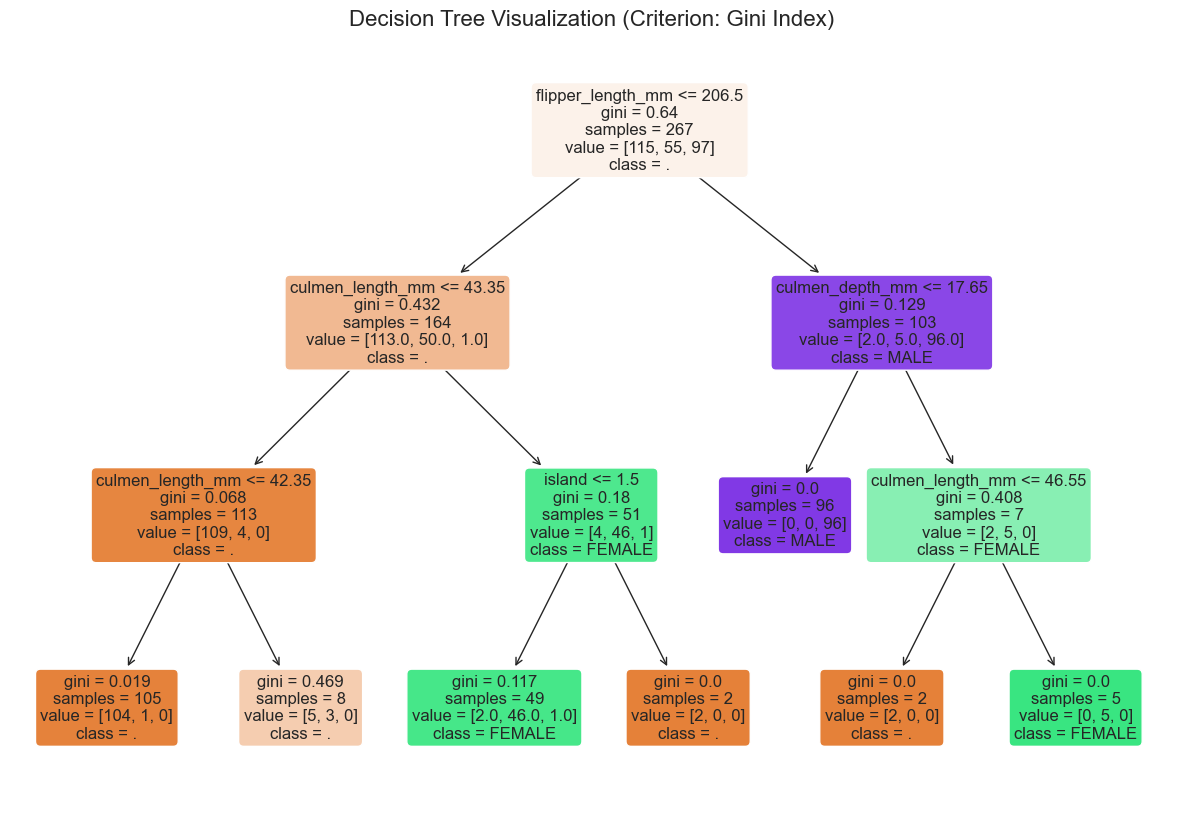

In [84]:
# Visualize decision trees
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns.tolist(), 
          class_names=label_encoder.classes_.tolist(), 
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.title("Decision Tree Visualization (Criterion: Gini Index)", fontsize=16)
plt.show()

##### Kedua model berhasil mencapai skor akurasi yang tinggi dan menunjukkan kinerja klasifikasi yang sangat baik. Model indeks Gini memiliki presisi yang sedikit lebih baik untuk kelas 1. Keduanya efektif dalam memprediksi spesies dalam dataset, dan pilihan di antara keduanya bergantung pada kebutuhan aplikasi yang spesifik.

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset
url = "https://raw.githubusercontent.com/Bahar812/Data-Mining--Week-4/refs/heads/main/penguins_size.csv"
data = pd.read_csv(url)

# Handle missing values
data.dropna(inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])
data['island'] = label_encoder.fit_transform(data['island'])
data['sex'] = label_encoder.fit_transform(data['sex'].astype(str))

# Split the dataset into features (X) and target (y)
X = data.drop('species', axis=1)
y = data['species']

# Split the data into training and test sets (20% test size, random state 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model with Entropy criterion
model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
model_entropy.fit(X_train, y_train)

# Predict for Entropy
y_pred_entropy = model_entropy.predict(X_test)

# Confusion Matrix and Classification Report for Entropy
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
class_report_entropy = classification_report(y_test, y_pred_entropy)

# Train model with Gini criterion
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
model_gini.fit(X_train, y_train)

# Predict for Gini
y_pred_gini = model_gini.predict(X_test)

# Confusion Matrix and Classification Report for Gini
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)
class_report_gini = classification_report(y_test, y_pred_gini)

# Displaying the results
print("3. Confusion matrix and classification report of criterion Entropy and Gini index\n")
print("Confusion Matrix Entropy")
print(conf_matrix_entropy)
print("\nConfusion Matrix Gini Index")
print(conf_matrix_gini)


3. Confusion matrix and classification report of criterion Entropy and Gini index

Confusion Matrix Entropy
[[30  1  0]
 [ 1 12  0]
 [ 0  0 23]]

Confusion Matrix Gini Index
[[31  0  0]
 [ 1 12  0]
 [ 0  0 23]]


In [86]:
# Confusion Matrix and Classification Report for Entropy
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
class_report_entropy = classification_report(y_test, y_pred_entropy)

print("\nClassification Report Entropy")
print(class_report_entropy)


print("Classification Report Gini Index")
print(class_report_gini)


Classification Report Entropy
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00        23

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67

Classification Report Gini Index
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



###### Kedua model berhasil mendapatkan skor akurasi yang tinggi dan menunjukkan kinerja klasifikasi yang sangat baik. Model indeks Gini memiliki presisi yang sedikit lebih baik untuk kelas 1. Kedua kriteria ini efektif dalam memprediksi spesies dalam dataset, dan pilihan di antara keduanya tergantung pada kebutuhan aplikasi yang spesifik.

## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset
url = "https://raw.githubusercontent.com/Bahar812/Data-Mining--Week-4/refs/heads/main/penguins_size.csv"
data = pd.read_csv(url)

# Handle missing values
data.dropna(inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])
data['island'] = label_encoder.fit_transform(data['island'])
data['sex'] = label_encoder.fit_transform(data['sex'].astype(str))

# Split the dataset into features (X) and target (y)
X = data.drop('species', axis=1)
y = data['species']

# Split the data into training and test sets (20% test size, random state 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# a. Defining the model
model = GaussianNB()
print("Model defined using Gaussian Naive Bayes.")

# b. Fit the model
model.fit(X_train, y_train)
print("Model fitted to the training data.")

# c. Predict the test set results
y_pred = model.predict(X_test)
print("Predictions made on the test set.")

Model defined using Gaussian Naive Bayes.
Model fitted to the training data.
Predictions made on the test set.


In [88]:
# e. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# d. Check accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)


Confusion Matrix:
[[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]
Accuracy Score: 1.0


In [89]:
# f. Classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



##### Model Gaussian Naive Bayes mencapai skor akurasi sempurna sebesar 1.00 (100%) pada set tes, menunjukkan kinerja yang luar biasa dalam mengklasifikasikan spesies penguin. Matriks kebingungan menunjukkan tidak ada kesalahan klasifikasi, dengan semua sampel diprediksi dengan benar di semua kelas. Selain itu, laporan klasifikasi menampilkan presisi, recall, dan F1-score yang sempurna untuk setiap kelas, yang mengonfirmasi keandalan dan efektivitas model dalam memprediksi spesies.

Good Luck :)